In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [12]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Label: 5


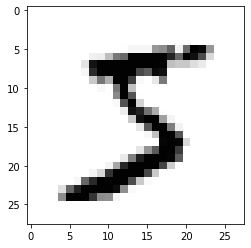

In [4]:
%matplotlib inline
def show_number(X_train_or_test, y_train_or_test, x):
    print("Label:", y_train_or_test[x])
    plt.imshow(X_train_or_test[x], cmap='Greys')
show_number(X_train, y_train, 0)

In [14]:
X_train_images = X_train.reshape(60000, 784)
X_test_images = X_test.reshape(10000, 784)
X_train_images = X_train_images.astype('float32')
X_test_images = X_test_images.astype('float32')
X_train_images /= 255
X_test_images /= 255

In [15]:
y_train_labels = keras.utils.to_categorical(y_train, 10)
y_test_labels = keras.utils.to_categorical(y_test, 10)

In [47]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (784,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [48]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [49]:
history = model.fit(X_train_images, y_train_labels, batch_size = 100, epochs = 10, verbose = 2, 
                    validation_data = (X_test_images, y_test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 8s - loss: 0.3321 - accuracy: 0.8974 - val_loss: 0.1191 - val_accuracy: 0.9636
Epoch 2/10
60000/60000 - 6s - loss: 0.1605 - accuracy: 0.9511 - val_loss: 0.0860 - val_accuracy: 0.9733
Epoch 3/10
60000/60000 - 7s - loss: 0.1285 - accuracy: 0.9602 - val_loss: 0.0836 - val_accuracy: 0.9744
Epoch 4/10
60000/60000 - 7s - loss: 0.1103 - accuracy: 0.9658 - val_loss: 0.0744 - val_accuracy: 0.9767
Epoch 5/10
60000/60000 - 6s - loss: 0.0969 - accuracy: 0.9700 - val_loss: 0.0696 - val_accuracy: 0.9800
Epoch 6/10
60000/60000 - 6s - loss: 0.0885 - accuracy: 0.9732 - val_loss: 0.0655 - val_accuracy: 0.9785
Epoch 7/10
60000/60000 - 6s - loss: 0.0816 - accuracy: 0.9750 - val_loss: 0.0620 - val_accuracy: 0.9822
Epoch 8/10
60000/60000 - 6s - loss: 0.0774 - accuracy: 0.9769 - val_loss: 0.0619 - val_accuracy: 0.9807
Epoch 9/10
60000/60000 - 6s - loss: 0.0714 - accuracy: 0.9779 - val_loss: 0.0617 - val_accuracy: 0.9824
Epoch 10/10
60

In [50]:
score = model.evaluate(X_test_images, y_test_labels, verbose = 0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.059381043925808626
Test accuracy: 0.9835


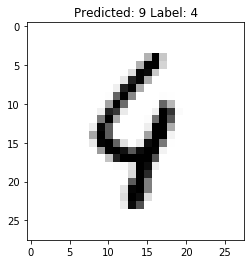

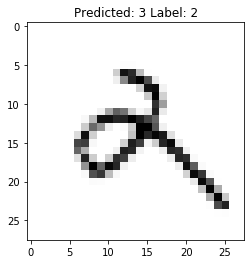

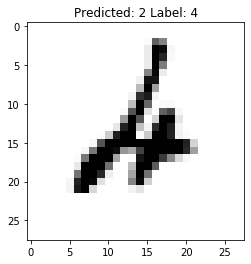

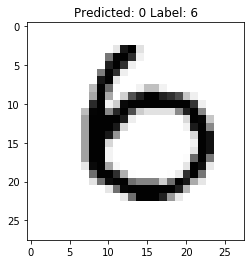

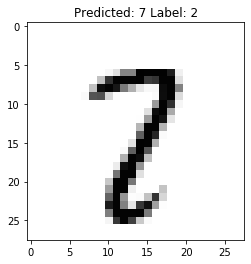

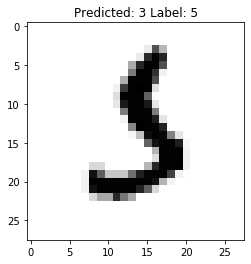

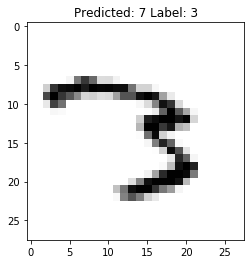

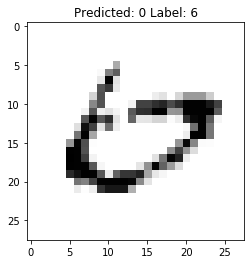

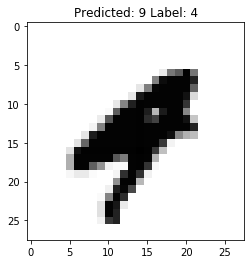

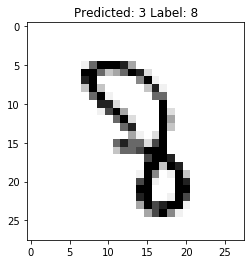

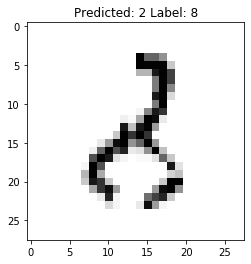

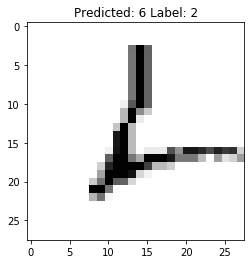

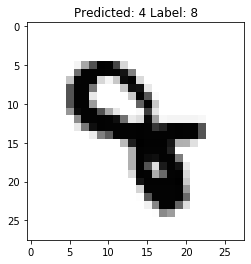

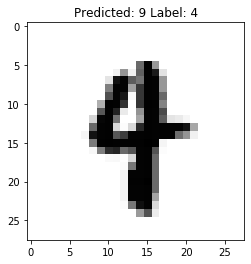

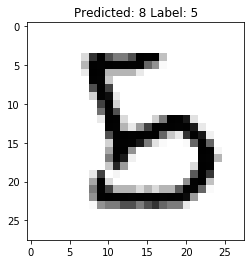

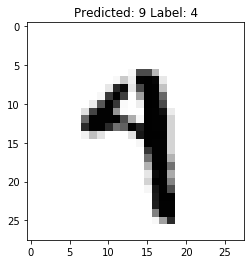

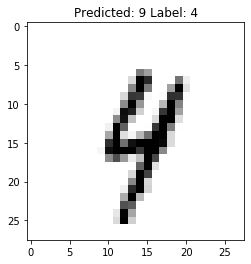

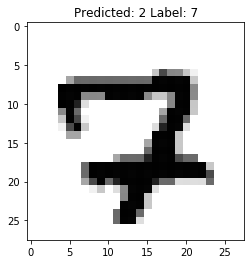

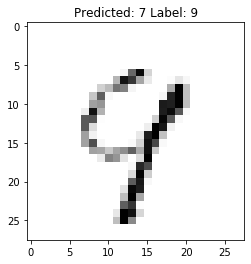

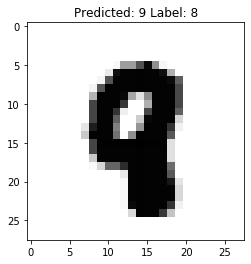

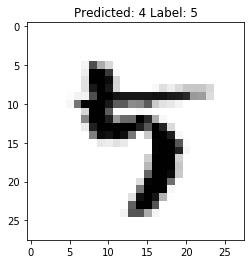

In [61]:
# prints wrongly recognized numbers
for i in range(1000):
    X_test_images1 = X_test_images[i, :].reshape(1, 784)
    predicted_category = model.predict(X_test_images1).argmax()
    label = y_test_labels[i].argmax()
    if (predicted_category != label):
        plt.title("Predicted: %d Label: %d" % (predicted_category, label))
        plt.imshow(X_test_images1.reshape([28, 28]), cmap = "Greys")
        plt.show()